In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.family'] = 'Trebuchet MS'

matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (8, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score


In [2]:
train_df = pd.read_csv('./train.csv')
features_df = pd.read_csv('./features.csv')
stores_df = pd.read_csv('./stores.csv')
test_df = pd.read_csv('./test.csv')

data = train_df.merge(features_df, on=['Store', 'Date', 'IsHoliday'], how='inner')
final_df = data.merge(stores_df, on=['Store'], how='inner')

In [3]:
store20 = final_df[final_df['Store'] == 20]
store20 = store20[['Date', 'Weekly_Sales']]
store20 = store20.groupby('Date').sum()
store20.reset_index(inplace=True)

store20['Date'] = pd.to_datetime(store20['Date'])  # Convert 'Date' column to datetime type
store20.columns = ['ds', 'y']  # Rename columns

In [4]:
y_train = store20.iloc[:120]
y_test = store20.iloc[120:]

In [5]:
model = ARIMA(y_train['y'], order=(5, 1, 0))  # Example order, you may need to tune this
model_fit = model.fit()

In [6]:
forecast = model_fit.forecast(steps=len(y_test))


findfont: Font family ['Trebuchet MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Trebuchet MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Trebuchet MS'] not found. Falling back to DejaVu Sans.


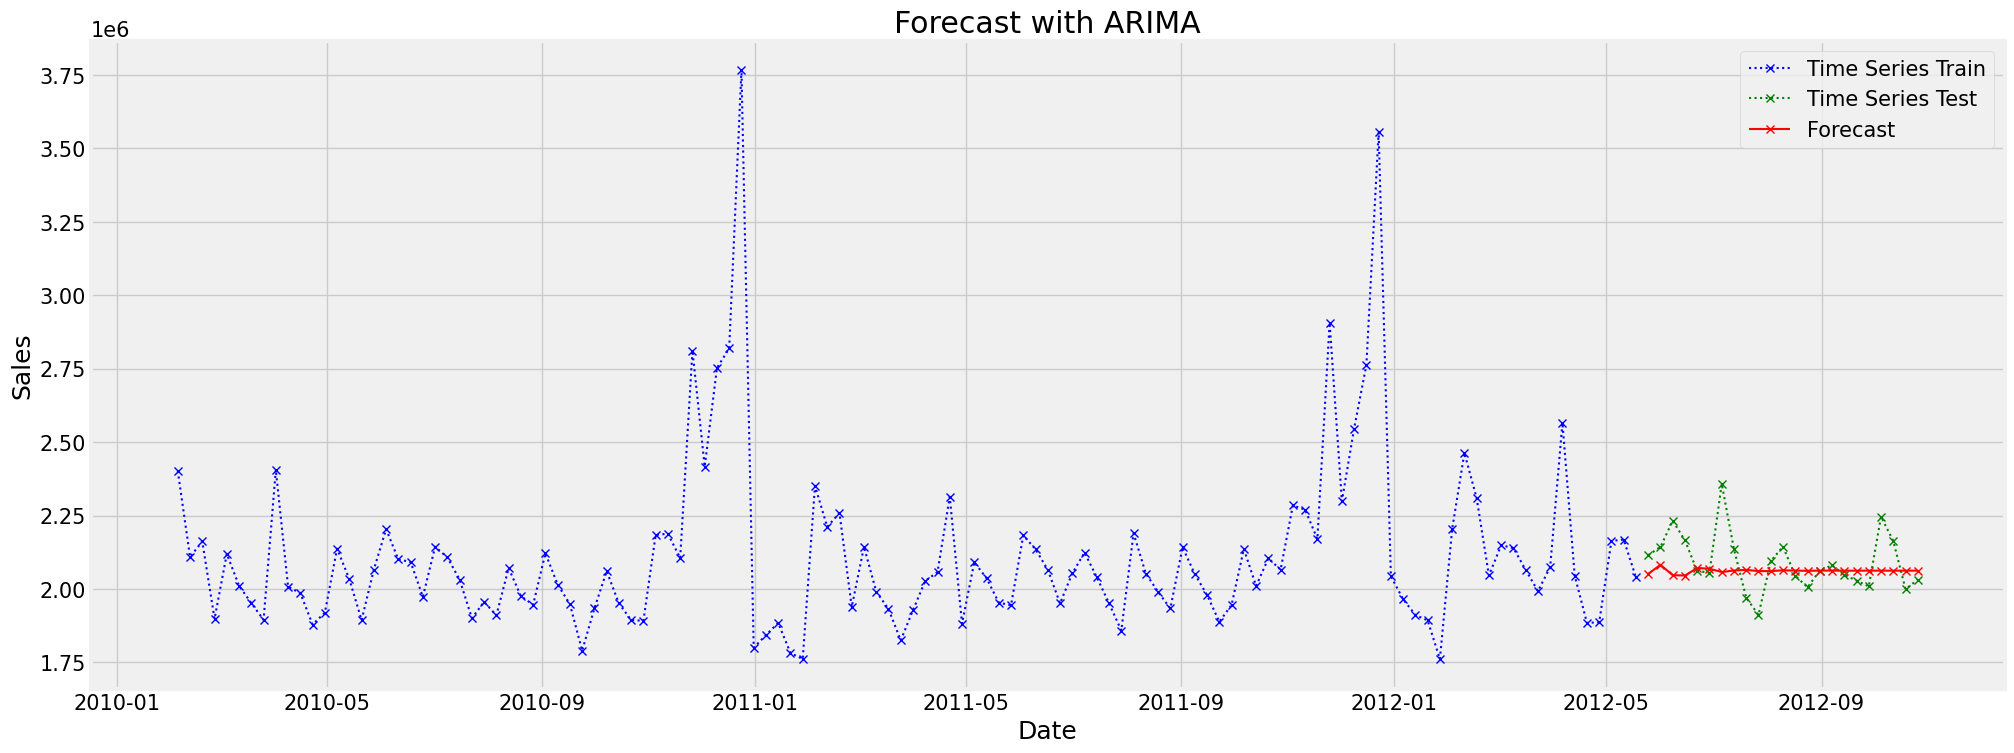

In [7]:
plt.figure(figsize=(22, 8))

plt.plot(y_train['ds'], y_train['y'], 'bx:', label='Time Series Train')
plt.plot(y_test['ds'], y_test['y'], 'bx:', color='green', label='Time Series Test')
plt.plot(y_test['ds'], forecast, 'bx-', color='red', label='Forecast')

plt.legend()
plt.title("Forecast with ARIMA")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.show()


In [8]:
y_pred = forecast

mape = mean_absolute_percentage_error(y_test['y'].values, y_pred)
mae = mean_absolute_error(y_test['y'].values, y_pred)
mse = mean_squared_error(y_test['y'].values, y_pred)
r2 = r2_score(y_test['y'].values, y_pred)

print(f"MAPE: {(mape) * (100)}%")
print(f"MAE: {(mae)}")
print(f"MSE: {(mse)}")
print(f"R2: {(r2)}")

MAPE: 3.5647012252240216%
MAE: 76331.73457894428
MSE: 10782775314.898726
R2: -0.13824079480292473


In [9]:
results = {}

for store in final_df['Store'].unique():
    # Analysis per store
    store_x = final_df[final_df['Store'] == store]
    store_x = store_x[['Date', 'Weekly_Sales']]
    store_x = store_x.groupby('Date').sum()
    store_x.reset_index(inplace=True)
    store_x['Date'] = pd.to_datetime(store_x['Date'])

    store_x.columns = ['ds', 'y']

    # Time series split to train the model
    y_train = store_x.iloc[:120]
    y_test = store_x.iloc[120:]

    # Model training
    model = ARIMA(y_train['y'], order=(5, 1, 0))  # Example order, you may need to tune this
    model_fit = model.fit()

    # Forecast
    forecast = model_fit.forecast(steps=len(y_test))

    y_pred = forecast

    mape = (mean_absolute_percentage_error(y_test['y'].values, y_pred).round(4)) * 100
    mae = mean_absolute_error(y_test['y'].values, y_pred).round(4)

    results[store] = [mape, mae]

# Print results
for store, metrics in results.items():
    print(f"Store {store}: MAPE = {metrics[0]}%, MAE = {metrics[1]}")


Store 1: MAPE = 4.72%, MAE = 73184.8015
Store 2: MAPE = 4.3999999999999995%, MAE = 81404.6911
Store 3: MAPE = 3.3099999999999996%, MAE = 13599.8461
Store 4: MAPE = 2.53%, MAE = 54028.2304
Store 5: MAPE = 5.6000000000000005%, MAE = 17759.1354
Store 6: MAPE = 6.069999999999999%, MAE = 96420.7972
Store 7: MAPE = 22.189999999999998%, MAE = 144699.9176
Store 8: MAPE = 3.0300000000000002%, MAE = 27321.2968
Store 9: MAPE = 5.58%, MAE = 29772.9246
Store 10: MAPE = 4.06%, MAE = 70568.4604
Store 11: MAPE = 4.73%, MAE = 62442.6507
Store 12: MAPE = 7.539999999999999%, MAE = 71355.4852
Store 13: MAPE = 3.65%, MAE = 73413.9831
Store 14: MAPE = 16.53%, MAE = 267789.377
Store 15: MAPE = 5.800000000000001%, MAE = 35828.7483
Store 16: MAPE = 12.35%, MAE = 69956.5623
Store 17: MAPE = 5.55%, MAE = 55231.7923
Store 18: MAPE = 5.26%, MAE = 55799.5131
Store 19: MAPE = 4.71%, MAE = 67678.6857
Store 20: MAPE = 3.56%, MAE = 76331.7346
Store 21: MAPE = 4.93%, MAE = 34596.8791
Store 22: MAPE = 5.25%, MAE = 54834.